In [1]:
# This tutorial demonstrates the basic features of the lens design software.
# MORE INFO HERE

In [2]:
# set matplotlib to plot inline

%matplotlib inline

In [3]:
# import the lens class from lens.py

from lens import lens

In [4]:
# create a lens object named "singlet". We assign the variable "new_lens" to this object

new_lens = lens(name='singlet')

In [5]:
# Add 4 surfaces: object surface, R1 of singlet, R2 of singlet, and the image plane
# The singlet will be immersed in air (default material type) and will be made of N-SF11
# The radii are arbitrarily chosen, R1 = 100 and R2 = infinity (default)
# The stop is chosen to be at the R1 surface and the lens thickness is chosen to be 5
# Note the units for radii, thickness, and diameters are lens units and that the
# numbering for surfaces starts at 0. The lens object is returned when the add_surface 
# method is called.

new_lens.add_surface(number=0, thickness=1e10, comment='object')
new_lens.add_surface(number=1, thickness=5, radius=50, stop=True, material='N-SF11')
new_lens.add_surface(number=2, thickness=100, radius=-1000)
new_lens.add_surface(number=3, comment='image')

In [6]:
# Add aperture: we set the aperture type to EPD (entrance pupil diameter) and the value to 25.4

new_lens.aperture_type = 'EPD'
new_lens.aperture_value = 25.4

In [7]:
# We specify that the system should choose the ideal working distance such that we're at best focus.
# Note that this is only updated when the update_paraxial method is called.

new_lens.image_solve = True

In [8]:
# Add fields: we set the field type to angle (units are degrees) and add 3 field values
# at 0, 10, and 14 degrees. Note that field numbering starts at 0.

new_lens.field_type = 'angle'
new_lens.add_field(number=0, x=0, y=0)
new_lens.add_field(number=1, x=0, y=10)
new_lens.add_field(number=2, x=0, y=14)

In [9]:
# Add wavelength: this lens is designed for the visible spectrum, so we choose 3 wavelengths
# at the D, F, and C lines

new_lens.add_wavelength(number=0, value=486.1)
new_lens.add_wavelength(number=1, value=587.6, primary=True)
new_lens.add_wavelength(number=2, value=656.3)

In [10]:
# Lastly, we set the lens apertures for zero vignetting. This means all light passing through
# our entrance pupil makes it through the system.

new_lens.update_paraxial()

In [11]:
# Now we will show a 2D rendering of this plot. First, we import the function "plot2D"
# from the visualize module

from visualize import plot2D

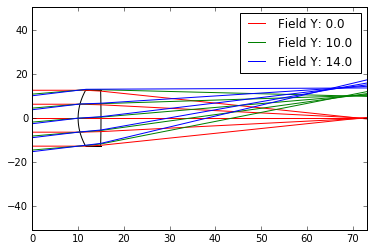

In [12]:
# We plot our new lens using the syntax below

plot2D(new_lens).show()

In [13]:
# Next, we will look at the ray aberration fans of this lens at each field.
# To do this we will need to import the analysis module

import analysis

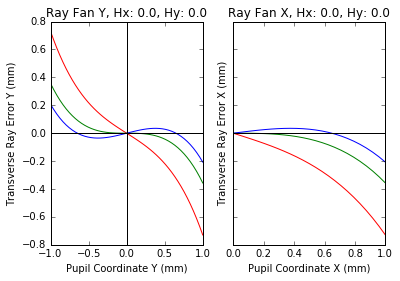

In [14]:
# Show the ray aberration plot for field 0 (0 degrees). We use normalized field
# coordinates when specifying the field value. This is defined as the field value
# divided by the maximum field value for X and Y separately.

analysis.ray_fan(new_lens, Hx=0, Hy=0)

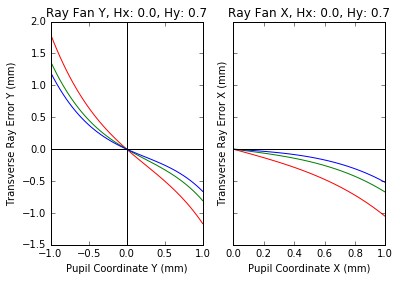

In [15]:
# show for the 10 degree field. So, Hy = 10/14 = 0.714

analysis.ray_fan(new_lens, Hx=0, Hy=0.714)

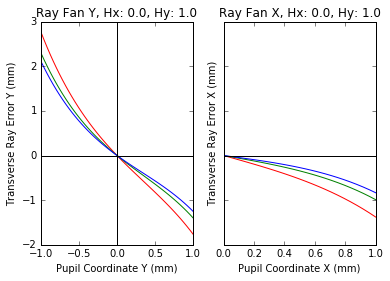

In [16]:
# Lastly, show the 14 degree field. So, Hy = 14/14 = 1

analysis.ray_fan(new_lens, Hx=0, Hy=1)

In [17]:
# Next, we will perform spot diagram analyses for each field of our lens.
# To do so, we need to first define the pupil distribution that we wish to use
# for our spot diagrams. This requires the distribution class from the distribution
# module.

from distribution import distribution

In [18]:
# There are several distribution types that can be used. We will use a "hexapolar"
# distribution with 100 points. Note, the actual number of points may vary from the
# input value. This should only be treated as approximate

pupil_dist = distribution(type_='hexapolar', num_pts=100)

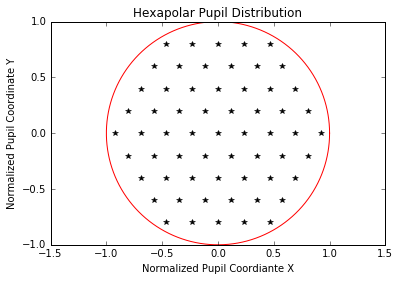

In [19]:
# After creating the distribution we plot the points.

pupil_dist.show()

Wave: 486.1 nm, RMS Radius: 0.382 mm, Geo. Radius: 0.818 mm
Wave: 587.6 nm, RMS Radius: 0.146 mm, Geo. Radius: 0.368 mm
Wave: 656.3 nm, RMS Radius: 0.063 mm, Geo. Radius: 0.187 mm


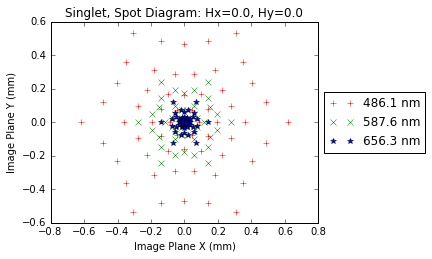

In [20]:
# Now that the pupil distribution has been defined, we will use it to create spot
# diagrams at each field. We start with the 0 degree field, therefore Hy=0.

analysis.spot_diagram_standard(new_lens, pupil_dist, Hx=0, Hy=0)

Wave: 486.1 nm, RMS Radius: 0.749 mm, Geo. Radius: 1.561 mm
Wave: 587.6 nm, RMS Radius: 0.505 mm, Geo. Radius: 1.098 mm
Wave: 656.3 nm, RMS Radius: 0.410 mm, Geo. Radius: 0.915 mm


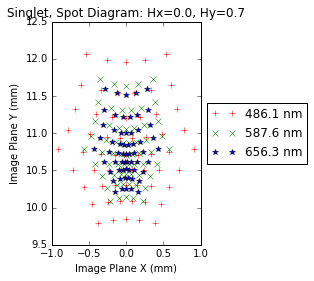

In [21]:
# Show spot diagram for the 10 degree field. So, Hy = 10/14 = 0.714

analysis.spot_diagram_standard(new_lens, pupil_dist, Hx=0, Hy=0.714)

Wave: 486.1 nm, RMS Radius: 1.130 mm, Geo. Radius: 2.298 mm
Wave: 587.6 nm, RMS Radius: 0.879 mm, Geo. Radius: 1.817 mm
Wave: 656.3 nm, RMS Radius: 0.781 mm, Geo. Radius: 1.628 mm


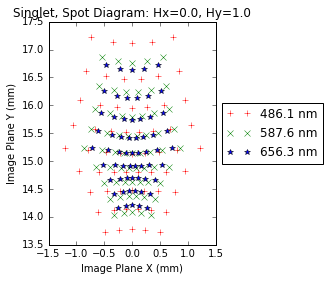

In [22]:
# Show the spot diagram from the 14 degree field

analysis.spot_diagram_standard(new_lens, pupil_dist, Hx=0, Hy=1)

In [23]:
# Next, we will analyze the wavefront of the singlet. To do this we require the wavefront module

from wavefront import wavefront

In [24]:
# Calculate the wavefront of our system using the previously-defined pupil distribution

system_wavefront = wavefront(new_lens, pupil_dist, Hx=0, Hy=1)

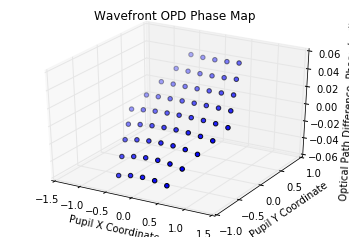

In [25]:
# Show the wavefront map

system_wavefront.show_phase()

In [26]:
# Next, we will perform a Zernike fit of the wavefront map at the 14 degree field.
# To do this we require the fit class from the zernike module

from zernike import fit

In [27]:
# We will fit the maximum number of terms, 36, and will remove piston from the result.
# Note that Zernike fringe coefficients are used.

zernike_fit = fit(system_wavefront, num_terms=36, remove_piston=True)

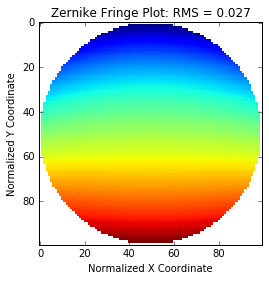

In [28]:
# To show the resulting fit, we use the show method. First we plot in 2D.
# We specify that we want 100 points in each axis, so 10,000 points total

zernike_fit.show(projection='2d', num_pts=100)

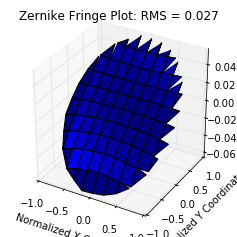

In [29]:
# Next, we plot in 3D. The default number of points in each axis is 100, so
# we omit the num_pts input variable.

zernike_fit.show(projection='3d')

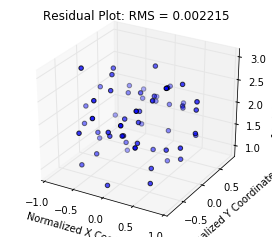

In [30]:
# To determine the goodness of fit, we calculate the residual of the Zernike fit.

zernike_fit.show_residual()

In [31]:
# Next, we will optimize our system to bring the rear focal length to 100 and the spherical aberration to a
# minimum. To do so we will need the merit class from the merit module. This class allows the user to define
# operands, or targets, for a system. It also allows for the definition of variables, which are system
# characteristics that will vary during optimization.

from merit import merit

In [32]:
# We instantiate a new merit function and add f2 (rear focal length) with a target of 100 and weight 1, and then
# seidel 1, which is spherical aberration, with a target of 0 and a weight of 0.1.

new_merit = merit()
new_merit.add_operand(new_lens, type_='f2', target=100, weight=1) # effl
new_merit.add_operand(new_lens, type_='seidel', seidel_number=1, target=0, weight=0.1) # spherical aberration

In [33]:
# Will will allow the radii of both surfaces of our singlet to vary, as shown below.

new_merit.add_variable(new_lens, type_='radius', surf_num=1)
new_merit.add_variable(new_lens, type_='radius', surf_num=2)

In [34]:
# To list information about our current merit function, we use the info method. This shows that the current
# merit function value is 39.189 and shows the current values of the operands and variables.

new_merit.info()

Merit Function Information
  Value: 39.189373
  Operands: 
	 Number: 0
	   System: singlet
	   Type: f2
	   Weight: 1.000
	   Target: 100.000000
	   Value: 60.810630
	   Delta: -39.189370
	 Number: 1
	   System: singlet
	   Type: seidel
	   Weight: 0.100
	   Target: 0.000000
	   Value: -0.138000
	   Delta: -0.138000
  Variables: 
	 Number: 0
	   Type: radius
	   Value 50.000000
	 Number: 1
	   Type: radius
	   Value -1000.000000


In [35]:
# We will use the optimize function from the optimize module for our system optimization. This function 
# uses minimization function “minimize” from scipy.optimize to optimize a lens system based on a defined 
# merit object, which defines variables and operands to be used for optimization. The optimize function 
# permanently acts on defined system variables during processing. This means that variables will be 
# modified during the optimization process and will remain so even after optimization ceases. Note that 
# variable values will be modified whether or not the optimization converges.

from optimize import optimize

In [36]:
# The outputs are result, which contains information about the optimization, as defined in scipy 
# documentation for class scipy.optimize.OptimizeResult, and x0, which are the initial values of the
# variables before optimization took place. These can be used to undo the optimization.

result, x0 = optimize(new_merit)

In [37]:
# Again, we call the info method of the merit class. We now see that our merit function value is near
# zero, indicating that optimization has occurred. The rear focal length has changed 60.8 to our target
# value of 100. Likewise, the first seidel sum term corresponding to spherical aberration has been
# minimized. A value of zero for spherical aberration in a singlet is not physically attainable.

new_merit.info()

Merit Function Information
  Value: 0.003212
  Operands: 
	 Number: 0
	   System: singlet
	   Type: f2
	   Weight: 1.000
	   Target: 100.000000
	   Value: 99.999999
	   Delta: -0.000001
	 Number: 1
	   System: singlet
	   Type: seidel
	   Weight: 0.100
	   Target: 0.000000
	   Value: -0.032118
	   Delta: -0.032118
  Variables: 
	 Number: 0
	   Type: radius
	   Value 84.964954
	 Number: 1
	   Type: radius
	   Value -1000.194315


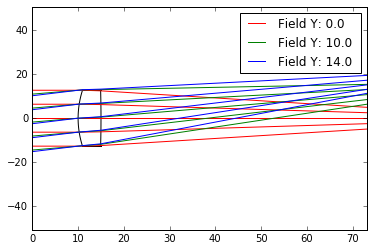

In [38]:
# We now plot our lens to see what changes have been made. Notice that our working distance is not set for
# our ideal image plane. We call update_paraxial to update this.

plot2D(new_lens).show()

In [39]:
new_lens.update_paraxial()

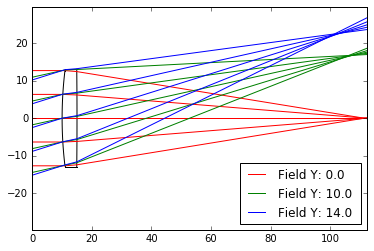

In [40]:
# Now plotting our lens shows system in focus.

plot2D(new_lens).show()